# Introduction to Time Series Analysis in Python

>A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. 


Reference: https://www.kdnuggets.com/2020/09/introduction-time-series-analysis-python.html

Date: 9/30/2020

Dataset: UMIMVS.csv
Series Title: Manufacturing: Total Manufacturing: Value of Shipments: Millions of Dollars: NSA

Objectives:

- Loading time series dataset correctly in Pandas
- Indexing in Time-Series Data
- Time-Resampling using Pandas
- Rolling Time Series
- Plotting Time-series Data using Pandas

In [1]:
import pandas as pd

In [12]:
df = pd.read_csv('datasets/UMTMVS.csv')
df.head()

,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


### Loading time series dataset
- use DATE column as the index
- convert the dtype from object to datetime

In [13]:
df = pd.read_csv("datasets/UMTMVS.csv", 
                 index_col="DATE", parse_dates=True)
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

### Indexing in Time-Series Data

In [15]:
df.loc['2000-01-01':'2015-01-01'] # get data from 2000-01-01 till 2015-05-01

,UMTMVS
DATE,
2000-01-01,314656.0
2000-02-01,342744.0
2000-03-01,374859.0
2000-04-01,344093.0
2000-05-01,356402.0
...,...
2014-09-01,512988.0
2014-10-01,505685.0
2014-11-01,458472.0


In [17]:
# syntax: ['starting date':'ending date':step]
df.loc['1992-01-01':'2000-01-01':12] # get all the first months from 1992-01-01 to 2000-01-01

,UMTMVS
DATE,
1992-01-01,209438.0
1993-01-01,223258.0
1994-01-01,234097.0
1995-01-01,260175.0
1996-01-01,263041.0
1997-01-01,280870.0
1998-01-01,290004.0
1999-01-01,293222.0
2000-01-01,314656.0


### Time-Resampling using Pandas

official doc: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

Some of the most commonly used frequency:

W : weekly frequency
M : month end frequency
SM : semi-month end frequency (15th and end of month)
Q : quarter end frequency

In [23]:
# Resampling the time series data based on yearly frequency (note:A: year end; AS: year start)
# calculate the mean value of shipment at the end of every year
df.resample(rule='A').mean().head() 

,UMTMVS
DATE,
1992-12-31,242002.000000
1993-12-31,251708.083333
1994-12-31,269842.666667
1995-12-31,289973.083333
1996-12-31,299765.666667


Use custom function

In [26]:
def sum_of_year(year_val):
    return year_val.sum()

df.resample(rule='A').apply(sum_of_year).head()

,UMTMVS
DATE,
1992-12-31,2904024.0
1993-12-31,3020497.0
1994-12-31,3238112.0
1995-12-31,3479677.0
1996-12-31,3597188.0


### Rolling Time Series

In [31]:
# calculate the rolling average of previous 10 months including current month
df.rolling(window=10).mean().head(20)

,UMTMVS
DATE,
1992-01-01,NaN
1992-02-01,NaN
1992-03-01,NaN
1992-04-01,NaN
1992-05-01,NaN
1992-06-01,NaN
1992-07-01,NaN
1992-08-01,NaN
1992-09-01,NaN


In [37]:
# check out the maximum value from a window of previous 30 months including current month 
df.rolling(window=30).max()[29:].head(20) # we start from the 29th value since the first 30 entries (start from index 0 to index 28) do not have values to calculate the max function

,UMTMVS
DATE,
1994-06-01,287336.0
1994-07-01,287336.0
1994-08-01,287336.0
1994-09-01,291357.0
1994-10-01,291357.0
1994-11-01,291357.0
1994-12-01,291357.0
1995-01-01,291357.0
1995-02-01,291357.0


### Plotting Time-series Data using Pandas

[Text(0, 0.5, 'Value'), Text(0.5, 1.0, 'Value of Manufactureres Shipments')]

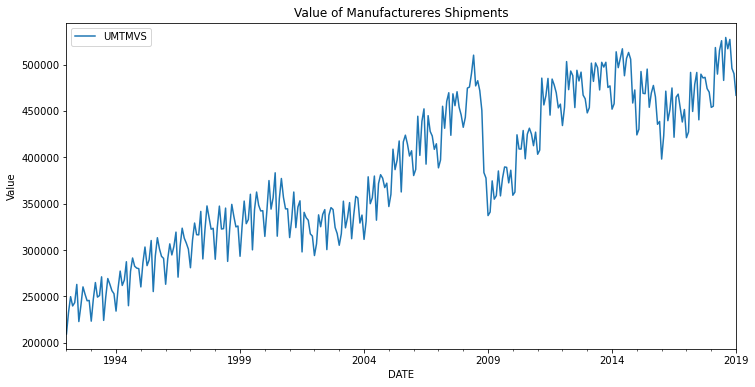

In [41]:
ax = df.plot(figsize=(12,6))
ax.set(title='Value of Manufactureres Shipments', ylabel='Value')

#### Plot the mean of the starting value of every year

[Text(0, 0.5, 'Value of Mean of Starting of Year'),
 Text(0.5, 1.0, 'Average of Manufacturers Shipments')]

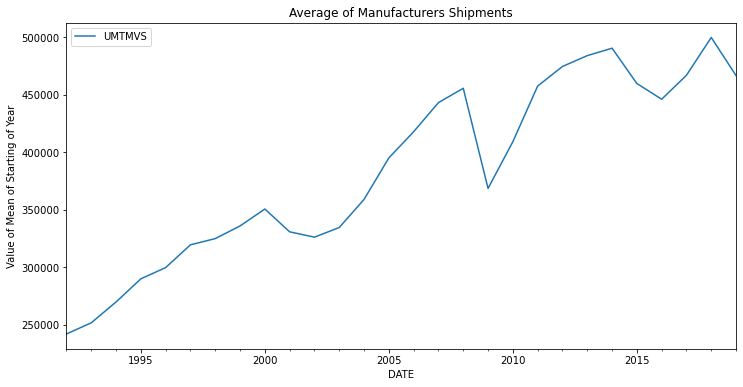

In [42]:
ax = df.resample(rule='AS').mean().plot(figsize=(12,6)) # AS: Year Start
ax.set(title='Average of Manufacturers Shipments', ylabel='Value of Mean of Starting of Year')

####  Bar plot for the mean of starting of every year

[Text(0, 0.5, 'Value of Mean of Starting of Year'),
 Text(0.5, 1.0, 'Average of Manufacturers Shipments')]

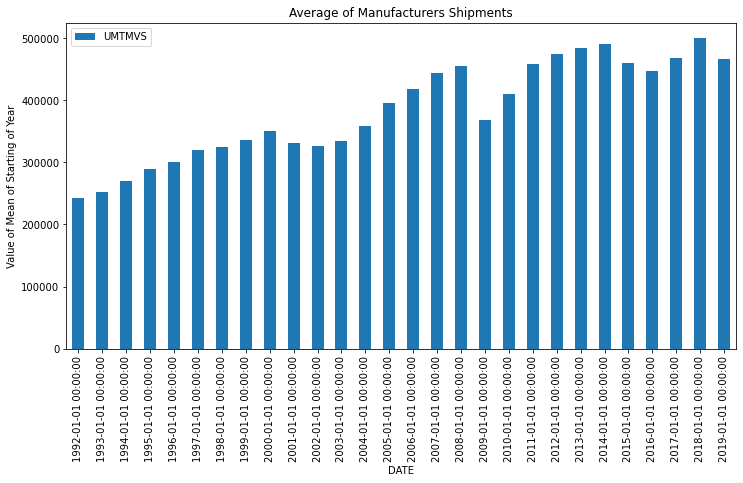

In [44]:
ax = df.resample(rule='AS').mean().plot.bar(figsize=(12,6))
ax.set(title='Average of Manufacturers Shipments', ylabel='Value of Mean of Starting of Year')

#### Plot the rolling mean and normal mean for the starting of the month

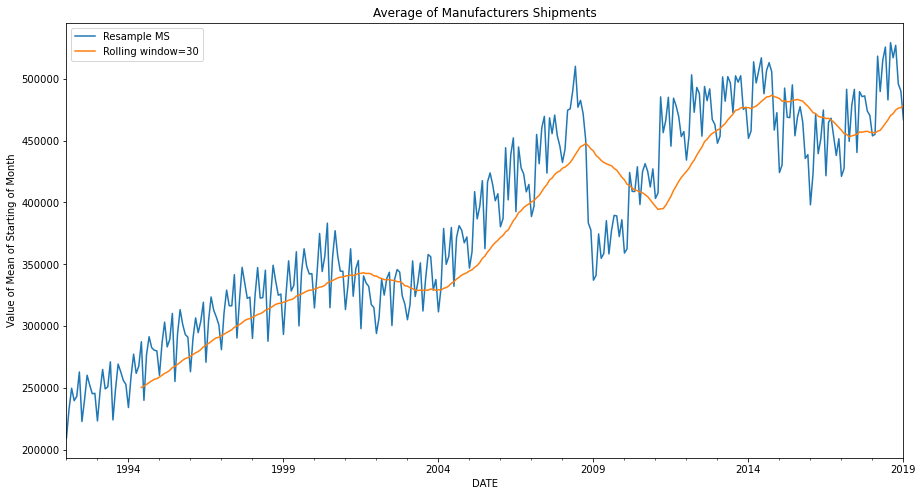

In [50]:
ax = df['UMTMVS'].resample(rule='MS').mean().plot(figsize=(15,8), label='Resample MS') # MS- Month Start Frequency
ax.autoscale(tight=True) # remove the extra plot portion, which is empty
df.rolling(window=30).mean()['UMTMVS'].plot(label='Rolling window=30')

ax.set(ylabel='Value of Mean of Starting of Month',title='Average of Manufacturers Shipments')
ax.legend()

Notice how the first 30 days are missing in Rolling Average, and since it is rolling average, it is pretty smooth, as compared to resample one.

#### Plot the maximum values for the start of every year from 1995 till 2005

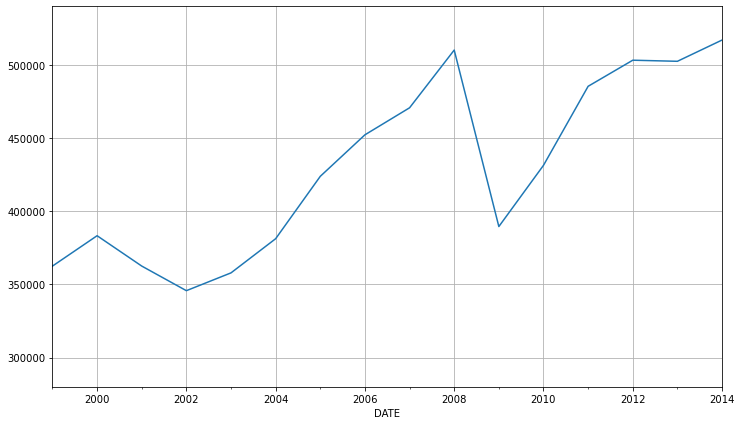

In [51]:
ax = df['UMTMVS'].resample(rule='AS').max().plot(xlim=["1999-01-01","2014-01-01"],
                                                 ylim=[280000,540000], 
                                                 figsize=(12,7))
ax.yaxis.grid(True)
ax.xaxis.grid(True)